# Capítulo 7

# Parte 1

# Exercício 1
*Objetivo: contar probabilidades de caracteres em uma string*

Uma característica importante de textos em linguagem natural é que a probabilidade de ocorrência de cada um dos caracteres não é a mesma. Isso significa que, por exemplo, em português, é muito mais comum encontrarmos a letra "A" que a letra "W" em uma palavra.

Então, podemos calcular a probabilidade: $P(\text{letra} | \text{texto})$, que é a probabilidade de, ao selecionarmos um caractere aleatório de um texto, encontrarmos a letra correspondente. Por exemplo, o código abaixo calcula $P(a|\text{texto})$:

In [1]:
texto = """SERIA SO SAUDADE"""

In [2]:
n_a = texto.count('A')
N_total = len(texto)
P_a_texto = n_a/N_total
print(P_a_texto)

0.1875


Podemos saber quais caracteres existem em uma string transformando-a em um `set`, como abaixo. 

Com base no código que já fizemos, faça um código para calcular P(letra|texto) para todos os caracteres da string. Após, use o código de exemplo (está comentado, logo abaixo) para gerar um bar plot das probabilidades que você calculou.

In [5]:
caracteres_unicos = set(texto)
print(caracteres_unicos)

{'O', 'U', 'S', 'A', ' ', 'I', 'E', 'D', 'R'}


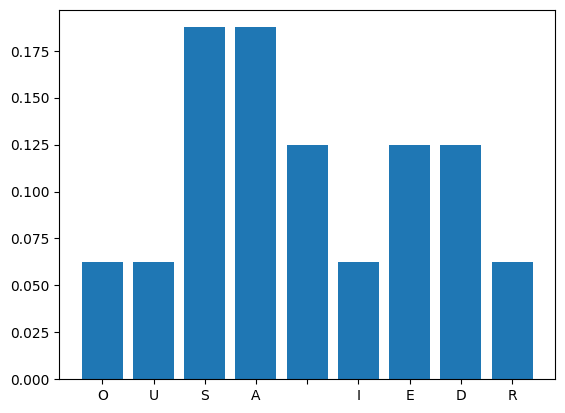

In [8]:
probs = []
for c in caracteres_unicos:
    n_c = texto.count(c)
    P_c_texto = n_c/N_total
    probs.append(P_c_texto)

import matplotlib.pyplot as plt

letras = list(caracteres_unicos)
plt.figure()
plt.bar(letras, probs)
plt.show()


## Exercício 2
*Objetivo: entender o que é codificação e suas implicações*

Quando nos comunicamos por escrito, usamos símbolos como "a", "b" ou "c". Esses símbolos fazem parte de um conjunto de símbolos válidos que é chamado de "alfabeto". O processo de codificação significa encontrar a correspondência entre símbolos de um alfabeto para outro. Um exemplo disso é quando usamos bytes para representar letras (como na tabela ASCII): nesse caso, temos um alfabeto de 256 combinações de bits que está sendo mapeado para símbolos do alfabeto usual.

1. Se usamos 1 byte para representar cada letra, quantos bytes são necessários para codificar a palavra BANANA?
1. Porém, se tivermos uma codificação de tamanho variável, em que B é codificado por 3 bits, N em 5 bits, a A em 12 bits, quantos bytes precisaríamos para codificar BANANA?
1. Se tivermos uma codificação de tamanho variável, em que B é codificado por 12 bits, N em 8 bits, a A em 3 bits, quantos bytes precisaríamos para codificar BANANA?
1. Se quisermos encontrar um código de tamanho variável para representar nosso texto de tal forma que o tamanho total do código seja mínimo, qual deve ser a relação entre o tamanho da codificação de cada caractere e a sua frequência de ocorrência?

## Exercício 3
*Objetivo: entender o algoritmo subjacente ao código de Huffman*

Uma das maneiras de encontrar códigos de tamanho mínimo para uma string inteira é usar o algoritmo de Huffman. A ideia do algoritmo é a seguinte:

1. Calculamos a probabilidade de encontrar cada um dos símbolos da string
1. Ordenamos os símbolos em ordem crescente de sua probabilidade de ocorrência, e colocamos esses símbolos numa lista
1. Tiramos os dois elementos de menor probabilidade da lista e unimos ambos em um terceiro, que tem probabilidade igual à soma das probabilidades dos elementos retirados.
1. Inserimos esse novo elemento na lista
1. Se há mais de um elemento na lista, voltamos ao passo 2.

Usando essa explicação do algoritmo, e sua implementação abaixo, desenhe (na lousa ou no papel!) a árvore que aparece quando tentamos representar as strings:

1. BANANA
1. BATMAN
1. ABACATE
1. ABCD

In [13]:
def huffman_tree(texto : str):
    """Monta a arvore de codificacao usando o algoritmo de huffman"""
    def get_prob(item):
        return item['prob']

    f = []

    # Calcula probabilidade de cada caractere      
    for c in set(texto):
        f.append(  {'prob':texto.count(c)/len(texto), 'valor':c} )
    f.sort(key=get_prob)
    
    while len(f) > 1:
        c1 = f.pop(0)
        c2 = f.pop(0)
        novo_node = {'valor':'NAO_FOLHA', 'prob':c1['prob']+c2['prob'], 'filho_0':c1, 'filho_1': c2}
        
        f.insert(0, novo_node)
        f.sort(key=get_prob)

    return f[0]

from pprint import pprint
pprint(huffman_tree("BANANA"))

{'filho_0': {'filho_0': {'prob': 0.16666666666666666, 'valor': 'B'},
             'filho_1': {'prob': 0.3333333333333333, 'valor': 'N'},
             'prob': 0.5,
             'valor': 'NAO_FOLHA'},
 'filho_1': {'prob': 0.5, 'valor': 'A'},
 'prob': 1.0,
 'valor': 'NAO_FOLHA'}


## Exercício 4
*Objetivo: realizar manualmente a codificação e a decodificação usando código de huffman*

Uma vez que temos a árvore de codificação de huffman, vamos, de fato, criar um código.

Para chegar da raiz da árvore até um nó-folha, precisamos passar por um caminho em que temos que decidir por ir pelo `filho_0` ou pelo `filho_1`. O código referente a cada caractere é o caminho que fizemos para chegar até ele, sendo que cada passagem por `filho_0` é um bit 0, e cada passagem por `filho_1` é um bit 1. Por exemplo, na árvore abaixo:

<img src="arvore_huffman.jpg" height=400 />

teríamos as codificações:

| Símbolo | Código |
| --- | --- |
| A | 1 |
| B | 01 |
| C | 00 |

portanto, uma sequência ABC seria codificada para 10100.

Da mesma forma, um código pode ser lido simplesmente seguindo a árvore. Ao receber, por exemplo, 100, primeiro fazemos o caminho na árvore com o bit 1, e isso nos dá o caractere A. Como temos um caractere, voltamos para o começo. Recebemos o bit 0, e chegamos a um nó não-folha, e depois um outro bit 0, e então chegamos a um nó-folha correspondendo ao caractere C, e, portanto, a mensagem é AC.

1. Como seria a codificação da sequência AABCB?
1. Qual sequência corresponde ao código 1010010100?
1. Usando a árvore que você criou para a palavra BANANA, encontre a codificação para a palavra BANANA. Faça o mesmo para BATMAN e ABACATE.
1. Crie uma codificação para a palvra BATMAN e use para codificar a palavra BANANA. Qual foi a sequência de bits encontrada?


## Exercício 5
*Objetivo: verificar o efeito de compressibilidade do código de huffman*

Se temos cinco caracteres no nosso alfabeto, tipicamente precisamos de três bits para representar cada caracteres.

1. Usando o procedimento que fizemos até agora, encontre a codificação de Huffman para a palavra ABACATE.
1. Quantos bits essa codificação tem? (resposta esperada: 15 bits)
1. Quantos bits são necessários para codificar ABACATE sem usar o código de Huffman? (resposta esperada: 21 bits)


## Exercício 6
*Objetivo: usar o conceito de entropia no contexto de compressão*

É um ponto razoavelmente pacífico dizer que a sequência AAAAAAA é mais simples que ABCDEFG. Mesmo que ambas tenham o mesmo tamanho, AAAAAAA tem somente a repetição de um caractere, ao passo que ABCDEFG tem caracteres diferentes que nunca se repetem.

1. Uma sequência mais previsível, isto é, que tende a repetir mais elementos, é mais compressível ou menos compressível ao usarmos códigos de Huffman?
1. Uma sequência menos previsível, isto é, que não repete muito seus elementos, é mais compressível ou menos compressível ao usarmos códigos de Huffman?
1. Uma sequência mais previsível tem entropia alta ou baixa?
1. Como a entropia deve se relacionar com a compressibilidade?
1. A *entropia de uma sequência* é usada como um limite inferior para o número de bits que devem ser usados para representá-la. Calcule a entropia das palavras BATMAN, BANANA e ABACATE e compare com o tamanho das sequências que encontramos usando os códigos de Huffman.

In [20]:
import numpy as np
import scipy.stats as stats
palavra = "BANANA"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs)
E*len(palavra)

6.068425588244111

# Parte 2

## Exercício 7
*Objetivo: entender o que significa um erro em uma cadeia*

Vamos partir agora da palavra BANANA. 

1. Como essa cadeia seria representada usando uma compressão por código de Huffman?
1. Escolha aleatoriamente um bit e mude na cadeia. Qual seria a palavra encontrada na descompressão?


## Exercício 8
*Objetivo: entender o que é redundância*

Vamos usar uma outra ideia. Agora, cada bit da sequência de BANANA passará a ser representado por dois bits, isto é, se a sequência fosse 101, ela passará a ser 110011. Neste caso:

1. O que acontece com a taxa de compressão que conseguimos usando o código de Huffman?
1. É possível detectar que um bit foi mudado aleatoriamente?
1. É possível corrigir o bit que foi mudado aleatoriamente?
1. Responda as perguntas 1, 2 e 3, desta vez para o caso de usarmos três bits para representar cada bit, isto é, uma sequência 101 será representada por 111000111.
1. No caso da codificação de três bits, é possível detectar que dois bits foram mudados aleatoriamente? E no caso da codificação de dois bits?

## Exercício 9
*Objetivo: entender o que é um bit de paridade e como usá-lo*

Uma outra ideia para detectar bits que foram mudados é usar um bit de paridade. A ideia do bit de paridade é que anexar um bit adicional a nossa sequência de bits. Esse bit adicional é igual a 1 se o número de bits "1" na sequência original for ímpar, e zero caso contrário.

Por exemplo, a cadeia 101 se tornaria 1010.

1. Qual seria o bit de paridade da sequência da palavra BANANA?
1. Como o bit de paridade permitiria detectar erros de um bit na palavra BANANA?

## Exercício 10
*Objetivo: encontrar bits de paridade em subsequências e usá-los para detectar erros*

À partir deste exercício, vamos encontrar bits de paridade em cadeias de tamanho fixo de 7 bits. O motivo desta escolha é mantermos a simplicidade na explicação.

Vamos partir da sequência: `1010111`, e numeraremos nossos bits de 0 a 6 (isto é, nossos bits podem ser representados por uma sequência). Agora, vamos calcular três bits de paridade diferentes:

* O primeiro bit de paridade se refere aos bits 0, 2, 4 e 6 da sequência de bits original,
* O segundo bit de paridade se refere aos bits 1, 2, 5 e 6
* O terceiro bit de paridade se refere aos bits 3, 4, 5, 6.

Ao recebermos nossa sequência, podemos checar cada um desses bits de paridade. Daí:

* Se não houver erro, todos os bits de paridade estarão corretos em relação à sequência. 
* Se houver erro no bit 0, então o primeiro bit de paridade acusará erro, mas os outros não acusarão.
* Se houver erro no bit 1, então o segundo bit de paridade acusará erro, mas os outros não acusarão.

Seguindo esse raciocínio, complete a tabela abaixo para os bits 2, 3, 4, 5, e 6.

| Bit corrompido | Bits de paridade |
| --- | --- |
| Sem erro | CCC |
| 0 | CCE |
| 1 | CEC |
| 2 |  |
| 3 |  |
| 4 |  |
| 5 |  |
| 6 |  |

# Parte 3

## Exercício 11
*Objetivo: programar um codigo de detecção de erros*

Complete o código abaixo para gerar os bits de paridade de subsequências e para detectar os erros em uma sequência de bits de dados usando o processo que discutimos acima. Use as representações que achar mais adequado.

In [2]:
def paridades(bits):
    paridade_1 = (bits[0] + bits[2] + bits[4] + bits[6]) % 2
    paridade_2 = (bits[1] + bits[2] + bits[5] + bits[6]) % 2
    paridade_3 = (bits[3] + bits[4] + bits[5] + bits[6]) % 2
    return [paridade_1, paridade_2, paridade_3]

def detectar_erro(bits_de_dados, bits_de_paridade):
    
    paridade_mensagem = paridades(bits_de_dados)
    if paridade_mensagem == bits_de_paridade:  
        return -1
    
    bits_diferentes = []
    for idx in range(len(bits_de_paridade)):
        if bits_de_paridade[idx] != paridade_mensagem[idx]:
            bits_diferentes.append(1)
        else:
            bits_diferentes.append(0)

    total = 0
    for idx in range(len(bits_diferentes)):
        total += bits_diferentes[idx]*2**idx
    
    return total

mensagem = [1,0,1,0,1,1,1]
paridade = paridades(mensagem)

mensagem_errada = [1,0,0,0,1,1,1]
print(detectar_erro(mensagem_errada, paridade))

3


## Exerício 12
*Objetivo: extrapolar o processo de correção de erro para mais bits*

1. No exercício 10, quantos casos de correção de erro tivemos, incluindo o caso de não haver erro?
1. Caso tivéssemos uma cadeia de 15 bits de dados, quantos bits de paridade precisaríamos?
1. Quantos bits de dados conseguimos proteger de erros usando 5 bits de paridade?

## Exercício 13
*Objetivo: refletir sobre o código de Hamming*

Segundo uma lenda, há muito tempo atrás, uma rainha governava um reino cercado por sete vizinhos. Em seu aniversário de 50 anos, a rainha recebeu uma garrafa de vinho de cada um de seus vizinhos. Porém, ela foi alertada de que uma das garrafas fora amaldiçoada, e quem a tomasse teria uma grande dor de barriga no dia seguinte.

A rainha convocou três valentes mosqueteiros em sua guarda real e, no dia seguinte, descobriu qual dos reinos vizinhos a havia traído.

Como a rainha fez isso?

PRAILEARN 1

In [2]:
# Quantos bits tem o código de Huffman para a palavra "python"?

PRAILEARN 3

In [ ]:
import numpy as np

X = np.array([[-0.61457983, -0.34293821, 1.62324095, -1.24841282, 0.93577205,  -0.96828502], [-0.12048460, -0.88131806, 0.43302299, 0.13504114, 1.12182772,  0.37018329], [0.05815684, -0.62963091, -0.06395262, 1.25868212, 1.05305655,  0.99107575], [0.33723240, 0.87357377, -0.54143124, 0.51057176, -1.42154099,  -0.65190656], [-0.56802839, 0.87626087, -0.58709053, 0.75182339, -0.43970420,  1.70910578], [-0.62421912, -0.28070789, 0.96653046, -0.24370783, -0.58321096,  0.63672964]])
Y = np.array([[-0.17916817, 0.28409880, -0.24293226, -0.00732522, -0.35133809,  -0.83945128], [-0.22546363, 0.80365171, -0.00071868, 0.22551336, -0.26270749,  0.42829669], [0.09218015, 0.24596023, 0.40882192, -0.86932676, -0.08972023,  -0.00960703], [0.17013813, 0.20729595, 0.75326756, 0.40222066, 0.31229945, -0.31836612], [-0.47287063, -0.41149427, 0.45430528, 0.10981427, -0.61720951,  0.08755449], [0.80994699, -0.02522320, 0.00653754, 0.13971552, -0.56658456,  0.05261594]])